1. 아래를 포함한 전처리 및 EDA 과정을 진행해 주세요 (Python을 이용해)
   1. `결측값이 있는 모든 열`을 없애 주세요
   2. `모든 연속형 변수 간의 상관관계를 Heatmap` 을 통해 확인해 주세요
   3. `모든 연속형 변수의 분포를 Histogram` 으로 확인해 주세요
   4. Target 변수와 관련 있거나 , 유의미한 Insight 를 얻을 수 있는 시각화를 5 개 이상 해주세요 `subplot 활용`
   
   
2. 1-4에서 도출된 시각화 + 번뜩이는 Insight 를 바탕으로 `유의미한 Feature` 를 10 개 이상 생성해주세요  
   (Target변수와 관련이 있으면 좋지만, 아니어도 괜찮습니다)

---

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')
plt.rc('font', family='Malgun Gothic')

In [2]:
df = pd.read_csv('Auction_master_kr/Auction_master_train.csv')

In [3]:
df.head()

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,...,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,...,NaN,N,해운대해변로,30.0,NaN,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,...,NaN,N,마린시티2로,33.0,NaN,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,...,NaN,N,모라로110번길,88.0,NaN,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,...,NaN,N,황령대로319번가길,110.0,NaN,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,...,NaN,N,오작로,51.0,NaN,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000


- Auction_key : 경매 아파트 고유 키값
- Auction_class : 강제경매, 임의경매
    - 강제경매 : 법원에 소송을 제기하여 판결을 얻은 후 집행권원에 따라 경매진행
    - 임의경매 : 등기부등본 담보권(저당권, 가압류 등)으로 경매 진행
- Bid_class : 입찰구분(일반, 개별, 일괄)
- Claim_price : 경매 신청인의 청구 금액
- Appraisal_company : 감정사
- Appraisal_date : 감정일자
- Auction_count : 총경매횟수
- Auction_miscarriage_count : 총유찰횟수
- Total_land_gross_area : 총토지전체면적
- Total_land_real_area : 총토지실면적
- Total_land_auction_area : 총토지경매면적
- Total_building_area : 총건물면적
- Total_building_auction_area : 총건물경매면적
- Minimum_appraisal_price : 총감정가
- Minimum_sales_price : 입찰 시 입찰인이 최저로 제시해야만 하는 금액
- First_auction_date : 최초경매일
- Final_auction_date : 최종경매일
- Final_result : 최종결과
- Creditor : 채권자, 경매 신청인
- addr_do : 주소_시도
- addr_si : 주소_시군구
- addr_dong : 주소_읍면동
- addr_li : 주소_리
- addr_san : 주소_산번지 여부
- addr_bunji1 : 도로명주소_번지1
- addr_bunji2 : 도로명주소_번지2
- addr_etc : 주소_기타주소
- Apartment_usage : 건물(토지)의 대표 용도
- Completion_date : 준공일
- Preserve_regist_date : 보존등기일, 건물을 신축하고 처음으로 등기
- Total_floor : 총층수
- Current_floor : 현재층수
- Specific : 기타_특이사항
- Share_auction_YorN : 지분경매 여부
    - 하나의 부동산이 전체가 아닌 일부만 경매가 진행 (하나의 부동산의 공유자가 지분으로 소유권을 가지고 있을 때 그중 일부 지분만 경매가 진행)
- road_name : 도로명주소_도로명
- road_bunji1 : 도로명주소_번지1
- road_bunji2 : 도로명주소_번지2
- Close_date : 종국일자
- Close_result : 종국결과
    - 낙찰과 배당의 차이 :  경매 진행은 ①경매진행(낙찰) ▷ ②낙찰허가결정 ▷ ③대금납부 ▷ ④배당 후 종결 로 이뤄집니다. 낙찰자가 최고가로 입찰(①)해서 낙찰허가(②)를 받으면 대금납부기한 낙찰금을 입금(③)합니다. 법원은 납부된 낙찰금을 가지고 채권자에게 순위에 의한 배당(④)을 해주고 경매는 종결됩니다.
- point.y : 위도
- point.x : 경도
- Hammer_price : 낙찰가

In [4]:
df.shape
# row 1933
# col 41

(1933, 41)

In [5]:
df.info()
# float64(11), int64(9), object(21)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 41 columns):
Auction_key                    1933 non-null int64
Auction_class                  1933 non-null object
Bid_class                      1933 non-null object
Claim_price                    1933 non-null int64
Appraisal_company              1933 non-null object
Appraisal_date                 1933 non-null object
Auction_count                  1933 non-null int64
Auction_miscarriage_count      1933 non-null int64
Total_land_gross_area          1933 non-null float64
Total_land_real_area           1933 non-null float64
Total_land_auction_area        1933 non-null float64
Total_building_area            1933 non-null float64
Total_building_auction_area    1933 non-null float64
Total_appraisal_price          1933 non-null int64
Minimum_sales_price            1933 non-null int64
First_auction_date             1933 non-null object
Final_auction_date             1933 non-null object
Final_resu

### 1-A. 결측치가 있는 열을 제거해주세요

In [6]:
# 결측치가 있는 feature는 다음과 같다.
df.isnull().sum()[df.isnull().sum() != 0]

addr_li        1910
addr_bunji1       4
addr_bunji2    1044
Specific       1869
road_bunji1      24
road_bunji2    1778
dtype: int64

In [7]:
# 결측치가 존재하는 feature를 삭제하자
remove_cols = df.isnull().sum()[df.isnull().sum() != 0].index.tolist()
df.drop(remove_cols, axis=1, inplace=True)

In [8]:
# 결측치가 있는 feature를 삭제했다.
df.isnull().sum().sum()

0

### 1-B. 연속형 변수의 상관관계를 시각화해주세요

In [9]:
df.corr()

,Auction_key,Claim_price,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,Total_floor,Current_floor,point.y,point.x,Hammer_price
Auction_key,1.000000,-0.136286,-0.020529,-0.013011,-0.021237,-0.099446,-0.093441,-0.126003,-0.117179,-0.322892,-0.403807,0.142475,0.097703,-0.812046,0.828253,-0.418769
Claim_price,-0.136286,1.000000,0.013312,0.015411,0.003771,0.180421,0.182207,0.202379,0.204000,0.248846,0.261076,0.016466,0.043258,0.095939,-0.103605,0.267728
Auction_count,-0.020529,0.013312,1.000000,0.972918,-0.045697,0.062824,0.062868,0.107074,0.104286,0.071038,-0.036716,-0.052329,-0.029124,-0.054074,0.051634,-0.016999
Auction_miscarriage_count,-0.013011,0.015411,0.972918,1.000000,-0.050457,0.069582,0.069392,0.118290,0.114779,0.077547,-0.033039,-0.045343,-0.021852,-0.057197,0.054032,-0.011296
Total_land_gross_area,-0.021237,0.003771,-0.045697,-0.050457,1.000000,0.049791,0.048225,0.017401,0.016474,0.041896,0.067135,0.100557,0.094385,0.014971,-0.014285,0.070466
Total_land_real_area,-0.099446,0.180421,0.062824,0.069582,0.049791,1.000000,0.996224,0.940361,0.934759,0.842248,0.711515,-0.072543,-0.062673,0.060602,-0.062621,0.696099
Total_land_auction_area,-0.093441,0.182207,0.062868,0.069392,0.048225,0.996224,1.000000,0.938144,0.941681,0.845243,0.715891,-0.068385,-0.061274,0.055776,-0.057796,0.700639
Total_building_area,-0.126003,0.202379,0.107074,0.118290,0.017401,0.940361,0.938144,1.000000,0.993533,0.900302,0.783299,0.107069,0.071110,0.062797,-0.064572,0.768454
Total_building_auction_area,-0.117179,0.204000,0.104286,0.114779,0.016474,0.934759,0.941681,0.993533,1.000000,0.901988,0.787366,0.108707,0.069819,0.055730,-0.057502,0.772839
Total_appraisal_price,-0.322892,0.248846,0.071038,0.077547,0.041896,0.842248,0.845243,0.900302,0.901988,1.000000,0.960357,0.169577,0.151757,0.220942,-0.222110,0.953464


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


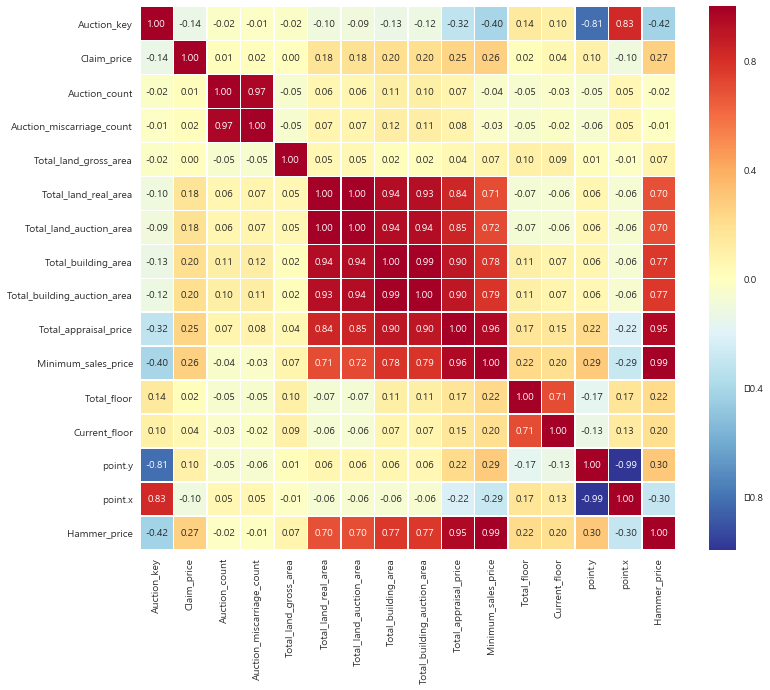

In [10]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap = 'RdYlBu_r', annot=True, fmt='.2f', linewidths=0.5)

# 반응변수(Hammer_price)와 강한 양의 상관관계를 가지는 feature가 더럿 보인다.
# Minimum_sales_price            0.994592
# Total_appraisal_price          0.953464
# Total_building_auction_area    0.772839
# Total_building_area            0.768454
# Total_land_auction_area        0.700639
# Total_land_real_area           0.696099

# 설명변수끼리도 강한 양의 상관관계를 보이는 변수가 있다.
# Auction_count - Auction_miscarriage_count (유찰횟수가 많았기 때문에 총 경매횟수가 많은건 자명하다)
# point.x - point.y (서울, 부산 지역의 데이터이기 때문에 자명하다.)
# Total_floor - Current_floor

# 설명변수끼리 강한 양의 상관관계를 가지는 feature가 몇몇 보인다.
# 다중공선성 문제는 추정의 분산을 크게 만드는 경향이 있으므로 처리해야 한다.

In [11]:
# target와 feature와의 상관계수를 내림차순으로 정렬
df.corr()['Hammer_price'].sort_values(ascending=False)

Hammer_price                   1.000000
Minimum_sales_price            0.994592
Total_appraisal_price          0.953464
Total_building_auction_area    0.772839
Total_building_area            0.768454
Total_land_auction_area        0.700639
Total_land_real_area           0.696099
point.y                        0.295698
Claim_price                    0.267728
Total_floor                    0.220830
Current_floor                  0.198013
Total_land_gross_area          0.070466
Auction_miscarriage_count     -0.011296
Auction_count                 -0.016999
point.x                       -0.296312
Auction_key                   -0.418769
Name: Hammer_price, dtype: float64

### 1-C. 모든 연속형 변수의 분포를 Histogram 으로 확인해 주세요

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A831C0D358>,
      dtype=object)

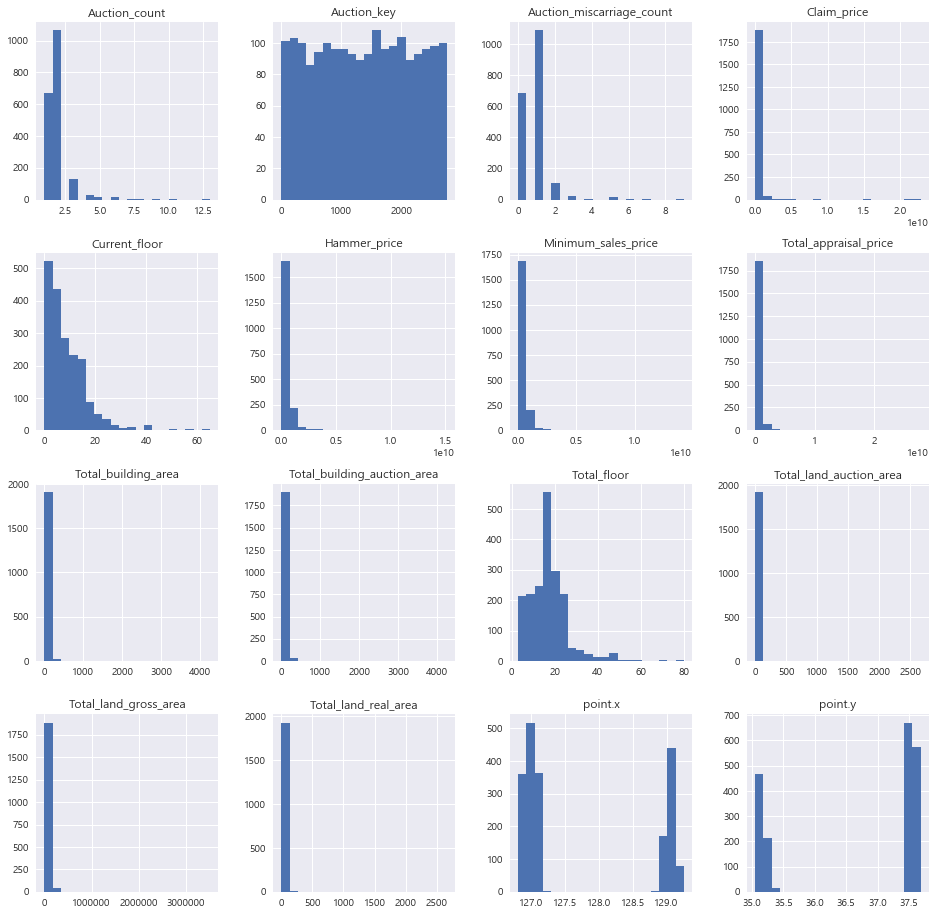

In [12]:
df.hist(figsize=(16, 16), bins=20)

# 대략적으로 히스토그램을 보도록 하자.
# 우선 막대 하나가 있는 것처럼 보이는 hist는 우측꼬리가 긴 형태이기 때문이다.
# 주로 가격 혹은 면적과 관련된 변수의 우측꼬리가 긴 형태임을 알 수 있다. (아마 극단치가 많다는 뜻이겠지)
# point.x와 point.y는 두 개의 그룹으로 나뉘어져 보이는데 이것은 서울과 부산 지역의 데이터이므로 자명하다.

### 1-D + feature engineering

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


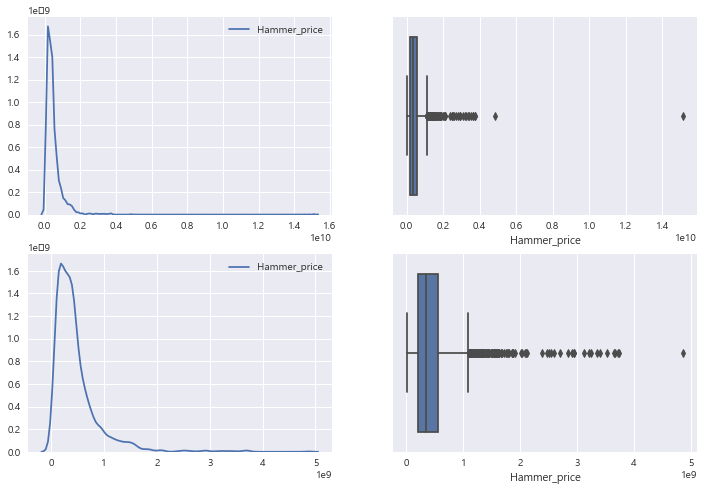

In [13]:
# target의 분포를 먼저 살펴보도록 하자.
# 전반적으로 우측꼬리가 긴 형태임을 확인할 수 있다.

plt.figure(figsize=(12, 8))

# 원본 데이터의 그래프
g1 = plt.subplot(2, 2, 1)
g1 = sns.kdeplot(df['Hammer_price'])

g2 = plt.subplot(2, 2, 2)
g2 = sns.boxplot(df['Hammer_price'])

# 극단치 하나 제거한 후의 그래프
g3 = plt.subplot(2, 2, 3)
g3 = sns.kdeplot(df['Hammer_price'][df['Hammer_price'] < df['Hammer_price'].max()])

g4 = plt.subplot(2, 2, 4)
g4 = sns.boxplot(df['Hammer_price'][df['Hammer_price'] < df['Hammer_price'].max()])

In [14]:
# countplot과 kdeplot을 그리는 함수

def get_plot(df, feature, target):
    
    plt.figure(figsize=(14, 5))
    
    g1 = plt.subplot(1, 2, 1)
    g1 = sns.countplot(df[feature])
    
    g2 = plt.subplot(1, 2, 2)
    labels = df[feature].unique().tolist()
    colors = ['red', 'blue', 'green', 'yellow', 'orange']
    for i in range(len(labels)):
        g2 = sns.kdeplot(df.loc[df[feature]==labels[i], target], color=colors[i], shade=True, label=labels[i])
    plt.legend()
    plt.show()

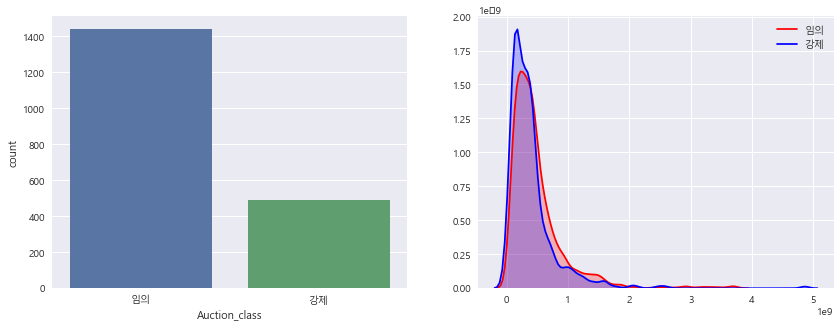

In [15]:
get_plot(df.drop(df['Hammer_price'].idxmax()), 'Auction_class', 'Hammer_price')

# 강제경매 : 법원에 소송을 제기하여 판결을 얻은 후 집행권원에 따라 경매진행
# 임의경매 : 등기부등본 담보권(저당권, 가압류 등)으로 경매 진행

# 임의, 강제에 따라 Hammer_price의 분포가 눈에 띄게 다르지는 않다.
# 임의 경매일 때 Hammer_price의 분산이 더 그다는 것 정도
# 평균적인 Hammer_price는 유사하다고 판단할 수 있겠다.

Bid_class
개별    3.643988e+08
일괄    1.609342e+09
일반    4.650927e+08
Name: Hammer_price, dtype: float64


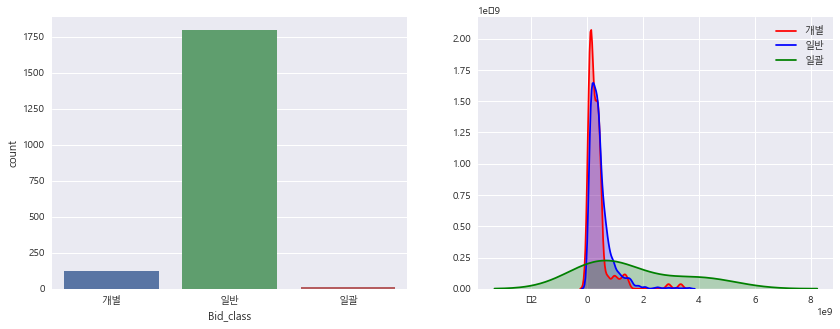

In [16]:
print(df.drop(df['Hammer_price'].idxmax()).groupby(by='Bid_class')['Hammer_price'].mean())

get_plot(df.drop(df['Hammer_price'].idxmax()), 'Bid_class', 'Hammer_price')

# 개별과 일반인 경우의 평균을 중심으로 밀집되어 분포하고 있으나
# 일괄의 경우 Hammer_price의 가격대의 분산이 매우 크다 (매우 다양한 범위에 위치해있다.)

# 일괄의 경우 여러개의 부동산을 묶어서 한 번에 매각하는 것을 뜻하며
# 그렇기 때문에 분산이 더 클 것이라고 예상한다. (여러개의 자산을 묶어서 처분하기 때문에)
# 평균 또한 일괄경매의 경우 더 크다

# Bid_class에 따라 Hammer_price의 차이가 존재하는 것으로 보인다.

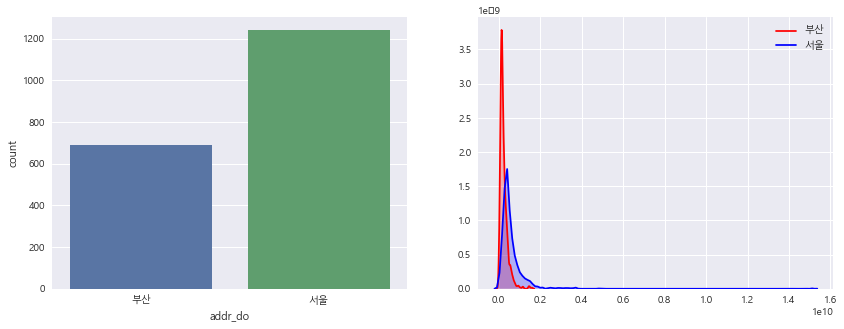

In [17]:
get_plot(df, 'addr_do', 'Hammer_price')
# 서울보다 부산의 분포가 더 밀집되어 있음을 알 수 있다.
# 또한 서울의 평균낙찰가가 부산보다 더 크다는 것을 알 수 있다.

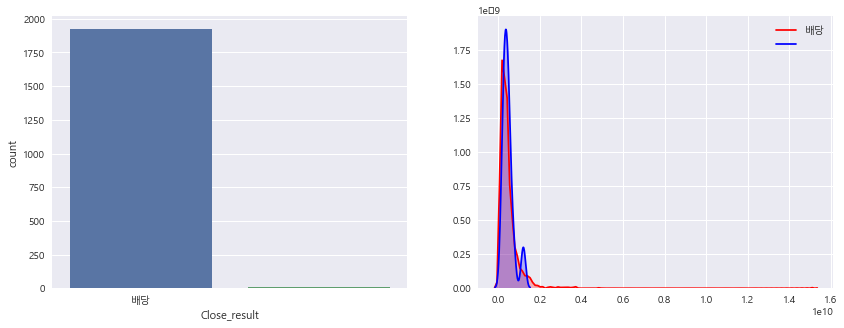

In [18]:
# Close_result가 빈칸인 데이터의 Close_date가 1111-11-11 00:00:00 이고, Hammer_price는 있는 것으로 보아
# 아직 낙찰만 이뤄지고, 배당이 이뤄지지 않은 것으로 보인다.
get_plot(df, 'Close_result', 'Hammer_price')

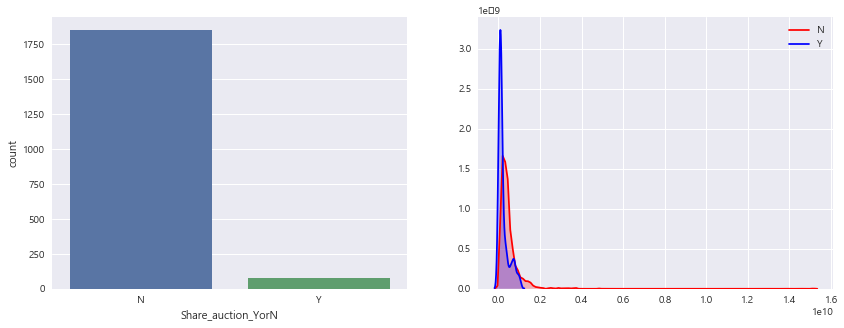

In [19]:
get_plot(df, 'Share_auction_YorN', 'Hammer_price')

# Y인 경우 분산이 작으며, N일 경우 분산이 크다
# 또한 N인 경우가 Y인 경우에 비해 평균이 크다.
# 두 개의 변수에 따라 Hammer_pirce의 차이가 존재할 것으로 예상된다.

### point.x, point.y 이용해 KMeans 해보기

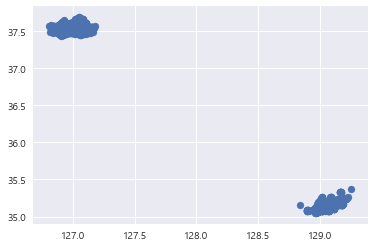

In [20]:
# 서울, 부산 지역의 데이터만 수집되었기 때문에 아래와 같은 scatter plot이 나오게 된다.
# KMeans clustering에서 n_clusters를 2로 설정하면 아마도 '서울', '부산' 지역으로 나뉘게 될텐데
# 우리의 데이터에는 이미 addr_do에 '부산', '서울' 지역에 대한 데이터가 있기 떄문에 불필요하다고 판단된다.
plt.scatter(x='point.x', y='point.y', data=df)

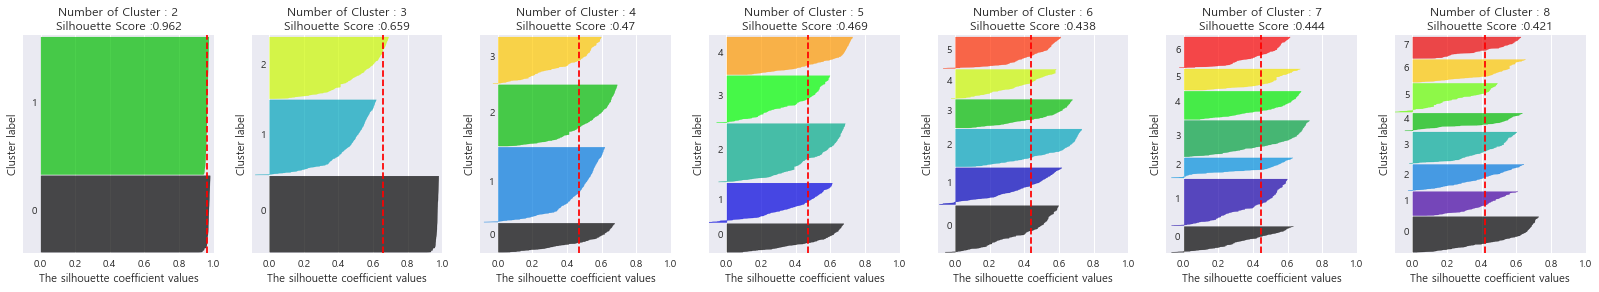

In [21]:
# 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
# 함수는 sklearn 공식 홈페이지

# 실제 KMeans 해본 결과
# k=2일 때 silhouette score가 가장 높다
# k=3부터는 실루엣계수가 (-)인 값이 보인다. (이것은 잘못 분류된 것을 의미한다.)


def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")
        
visualize_silhouette([2, 3, 4, 5, 6, 7, 8], df[['point.x', 'point.y']])

### 1. 상관계수 높은 6개의 feature를 PCA한 변수 생성

In [22]:
# 아래 feature끼리 상관계수 높았다.
# 다중공선성 문제는 회귀에서 회귀계수의 추정을 크게 만들고, 추정치의 분산을 크게 만드는 문제가 있기 때문에
# PCA로 new_feature를 생성하고, 그 설명변수의 값을 PCA된 값으로 대체하도록 하자
# (+ 상관계수가 높을수록 PCA 효과가 좋다고 한다.)
df[['Minimum_sales_price', 'Total_appraisal_price', 'Total_building_auction_area', 
    'Total_building_area', 'Total_land_auction_area', 'Total_land_real_area']].corr()

,Minimum_sales_price,Total_appraisal_price,Total_building_auction_area,Total_building_area,Total_land_auction_area,Total_land_real_area
Minimum_sales_price,1.000000,0.960357,0.787366,0.783299,0.715891,0.711515
Total_appraisal_price,0.960357,1.000000,0.901988,0.900302,0.845243,0.842248
Total_building_auction_area,0.787366,0.901988,1.000000,0.993533,0.941681,0.934759
Total_building_area,0.783299,0.900302,0.993533,1.000000,0.938144,0.940361
Total_land_auction_area,0.715891,0.845243,0.941681,0.938144,1.000000,0.996224
Total_land_real_area,0.711515,0.842248,0.934759,0.940361,0.996224,1.000000


In [23]:
from sklearn.decomposition import PCA
pca_1 = PCA(n_components=1)
pca_transformed_1 = pca_1.fit_transform(
    df[['Minimum_sales_price', 'Total_appraisal_price', 'Total_building_auction_area', 
    'Total_building_area', 'Total_land_auction_area', 'Total_land_real_area']])

print(pca_1.explained_variance_ratio_) # 1개의 주성분으로 98%의 변동을 설명할 수 있다.

[0.98373935]


In [24]:
df.drop(['Minimum_sales_price', 'Total_appraisal_price', 'Total_building_auction_area', 
   'Total_building_area', 'Total_land_auction_area', 'Total_land_real_area'], axis=1, inplace=True)

### 2. 도로의 너비에 따른 순서형 범주형변수 'road_size_encoded' 생성

In [25]:
# 도로의 너비에 따른 순서형 범주형변수 생성 (3)
# 참고 : https://www.juso.go.kr/statis/statisRoadMain.do
# 대로 / 로 / 길 

def road_size(x):
    if x.endswith("대로"): return int(3)
    elif x.endswith("로"): return int(2)
    elif x.endswith("길"): return int(1)
    
df['road_size_encoded'] = df.road_name.apply(road_size)

print(df['road_size_encoded'].value_counts())

1.0    961
2.0    807
3.0    141
Name: road_size_encoded, dtype: int64


In [26]:
#  부산 동래구 낙민동 237-2 -> '충렬대로'
idx1 = [29, 84, 122, 224, 239, 311, 370, 464, 491, 496, 560, 613, 637, 656, 658]
df.loc[idx1, 'road_size_encoded'] = 2

df.loc[564, 'road_size_encoded'] = 1 # 좌동순환로길

idx2 = [830, 1016, 1212, 1346, 1595, 1596, 1632, 1832]
df.loc[idx2, 'road_size_encoded'] = 2

In [27]:
df.drop(['road_name'], axis=1, inplace=True)

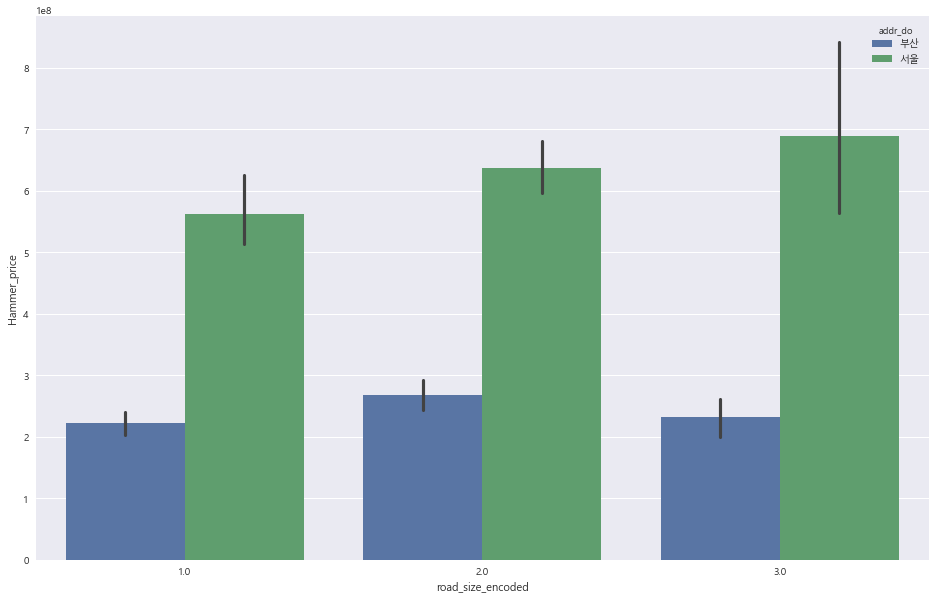

In [28]:
plt.figure(figsize=(16, 10))
sns.barplot(x='road_size_encoded', y='Hammer_price', data=df, hue='addr_do')

# 부산의 경우에는 길의 크기가 커질수록 Hammer_price가 높아지는 경향을 보였으나
# 서울의 경우 길의 크기에 따라 Hammer_price가 그다지 달라지지 않았다.

### 3. 경매기간을 나타내는 'auction_period' 파생변수 생성

In [29]:
# 경매기간에 따라 Hammer_price가 날라지지 않을까 예상해보았다.
# 따라서 auction의 시작, 종료 시점을 통해 acution_preriod라는 파생변수를 만들었다.

df['First_auction_date'] = df['First_auction_date'].apply(pd.to_datetime)
df['Final_auction_date'] = df['Final_auction_date'].apply(pd.to_datetime)

df['auction_preriod'] = (df['Final_auction_date'] - df['First_auction_date']).apply(lambda x:x.days)

<Figure size 1152x720 with 0 Axes>

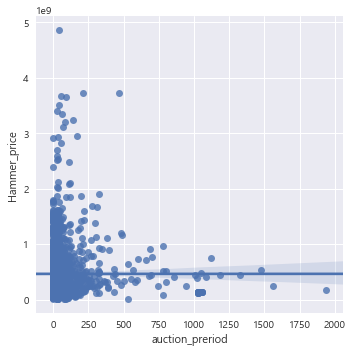

In [30]:
# 그래프를 통해 얻은 인사이트는
# 1. auction_preriod가 긴 경우에 Hammer_price가 높은 경우는 없었다는 점
# 2. Hammer_price가 높을수록 빠른 기간내에 경매가 종료된다는 점

plt.figure(figsize=(16, 10))
sns.lmplot(x='auction_preriod', y='Hammer_price', data=df.drop(df['Hammer_price'].idxmax(), axis=0))

### 4. Appraisal_company가 맡은 건수에 따라 Appraisal_company라는 파생변수 생성

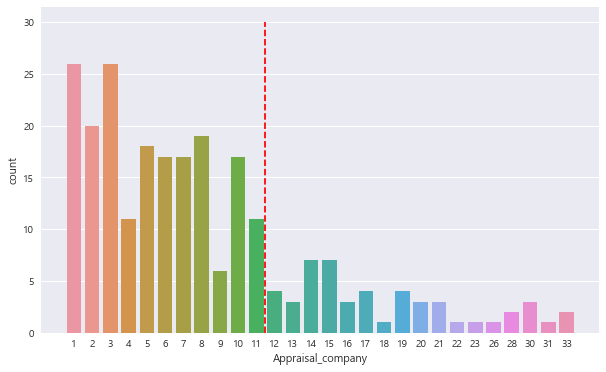

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(df['Appraisal_company'].value_counts())
plt.vlines(x=10.5, ymin=0, ymax=30, color='red', linestyles='--')

In [32]:
# 17건 미만이면 0으로
# 17건 이상으면 1으로 인코딩

appraisal_company_value = df['Appraisal_company'].value_counts()
appraisal_company_dict = {}

for name, cnt in zip(appraisal_company_value.index.tolist(), appraisal_company_value.values.tolist()):
    if cnt <17:
        appraisal_company_dict[name] = 0
    else:
        appraisal_company_dict[name] = 1
        
df['Appraisal_company_size'] = df['Appraisal_company'].replace(appraisal_company_dict)

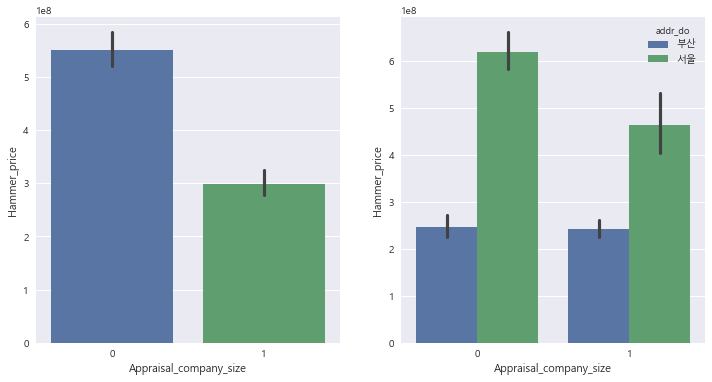

In [33]:
plt.figure(figsize=(12, 6))

g1 = plt.subplot(1, 2, 1)
g1 = sns.barplot(x='Appraisal_company_size', y='Hammer_price', data=df)

g2 = plt.subplot(1, 2, 2)
g2 = sns.barplot(x='Appraisal_company_size', y='Hammer_price', hue='addr_do', data=df)

# 감정건수 별 회사의 등급을 부여
# 감정건수가 많을 때 0으로 인코딩
# 감정건수가 없을 때 1으로 인코딩
# 값 비싼 건물의 경우 감정건수가 많은(=major라고 가정) 회사에서 감정을 받았을 것이라고 예상

# 실제 plot을 그려본 결과
# 0일때보다 1일 때 Hammer_price가 낮음을 확인할 수 있었다.
# 지역별로 보았을 때, 부산의 경우 차이가 별로 보이지 않았지만 서울의 경우 두드러지게 나타남

### 5. Total_floor에 따라 구간별 등급 부여한 'Total_floor_encoded' 파생변수 생성

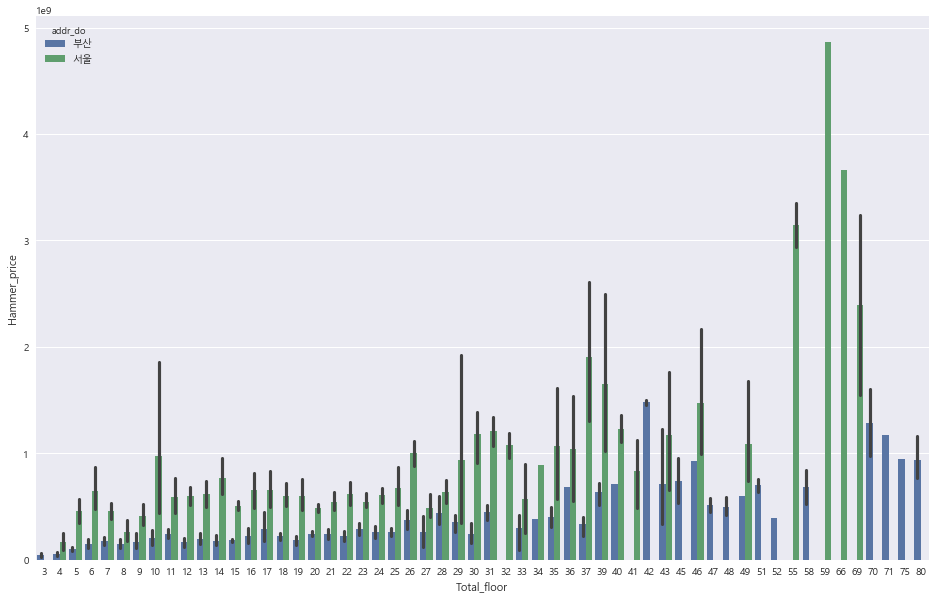

In [34]:
plt.figure(figsize=(16, 10))
sns.barplot('Total_floor', 'Hammer_price', hue='addr_do', data=df)

# 전반적으로 부산보다 서울의 Hammer_price가 높으며
# 3층 ~ 5층 정도의 경우 비교적 낮은 Hammer_price를 보인다. (아마 건물높이로 보아 주택으로 예상된다)
# 10층 ~ 30층 정도의 건물의 Hammer_price는 유사하다. (아마 일반적인 아파트로 예상된다)
# 50층을 넘어가면서부터 Hammer_price가 급격히 높아지는 경향이 보인다 (서울, 부산 모두) (초고층아파트)

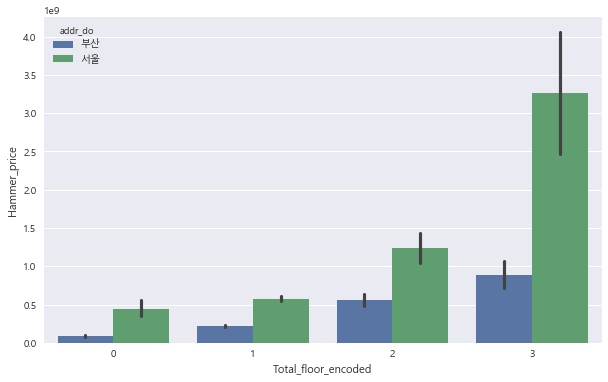

In [35]:
# 따라서 5층 이하의 경우 0, 30층 이하의 경우 1, 50층 미만의 경우 2, 50층 이상의 경우 3으로 인코딩해보도록 한다.

def Total_floor_encoding(x):
    if x<=5: return 0
    elif x<=30: return 1
    elif x<=50: return 2
    else: return 3
    
df['Total_floor_encoded'] = df['Total_floor'].apply(lambda x:Total_floor_encoding(x))

plt.figure(figsize=(10, 6))
sns.barplot(x='Total_floor_encoded', y='Hammer_price', data=df, hue='addr_do')

# 서울의 경우 0, 1 사이에는 큰 차이가 없어보이나 0, 1 / 2 / 3 사이의 Hammer_price에는 큰 차이가 존재한다
# 부산의 경우 0, 1, 2, 3 으로 갈수록 Hammer_price가 높아지는 경향을 보인다.

### 6. 상대적인 층수를 나타내는 'relative_floor' 파생변수 생성

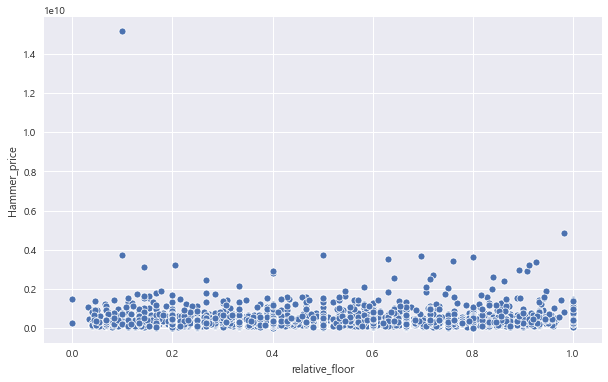

In [36]:
# 현재 층수와 Hammer_price 사이에 양의 상관관계가 있기에 상대적인 층수도 Hammer_price에 영향을 미치지 않을까 하는 생각에
# 상대적인 층수를 나타내는 'relative_floor'라는 변수 만들어 보았다.
df['relative_floor'] = df['Current_floor']/df['Total_floor']

# scatter plot을 확인해본 결과 별로 유의미한 관계는 보이지 않는다.
# 이전의 plot을 통해 전체 건물의 높이가 높을수록 Hammer_price가 높아지는 경향을 확인했었는데
# 전체 건물의 높이가 높아질수록 평균적인 현재 층수도 높아지는 것 때문에 
# 현재층수가 높아질수록 Hammer_price가 높아지지 않았나 라는 생각이 든다.

plt.figure(figsize=(10, 6))
sns.scatterplot('relative_floor', 'Hammer_price', data=df)
plt.show()

### 7. 지역과 usage를 결합한 파생변수 생성

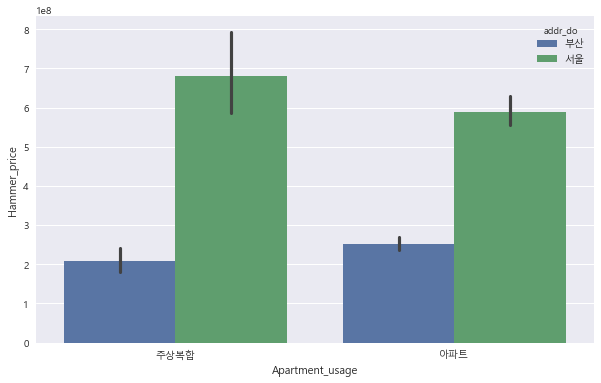

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Apartment_usage', y='Hammer_price', hue='addr_do', data=df)

# 부산의 경우 아파트가 더 Hammer_price 높고
# 서울의 경우 주상복합이 더 Hammer_price 높다

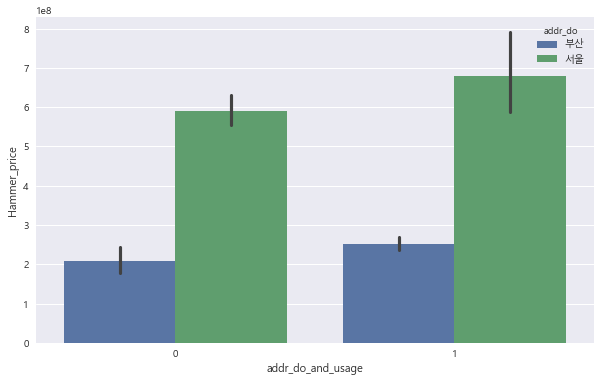

In [38]:
# 부산이고 + 아파트인 경우 = 1
# 서울이고 + 주상복합인 경우 = 1
# 나머지 = 0 인 feature 생성

df['addr_do_and_usage'] = 0
df.loc[(df['addr_do'] == '부산') & (df['Apartment_usage'] == '아파트'),   'addr_do_and_usage'] = 1
df.loc[(df['addr_do'] == '서울') & (df['Apartment_usage'] == '주상복합'), 'addr_do_and_usage'] = 1

plt.figure(figsize=(10, 6))
sns.barplot(x='addr_do_and_usage', y='Hammer_price', hue='addr_do', data=df)

### 8. Auction_count를 binary 변수로 변환

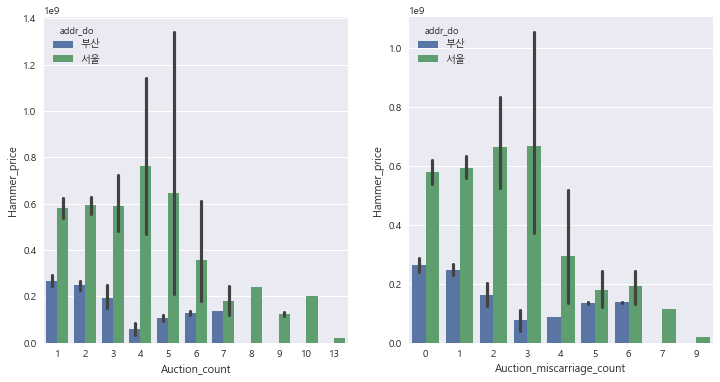

In [39]:
# 경매건수에 따라 Hammer_price에 차이 존재하는지 확인하고자 그래프 그려보았다.
# 확인결과 auction_count가 6를 넘어가면서부터 급격히 Hammer_price가 줄어드는 경향을 보였다.

plt.figure(figsize=(12, 6))
g1 = plt.subplot(1, 2, 1)
g1 = sns.barplot(x='Auction_count', y='Hammer_price', hue='addr_do'
                 , data=df.drop(df['Hammer_price'].idxmax(), axis=0))

g2 = plt.subplot(1, 2, 2)
g2 = sns.barplot(x='Auction_miscarriage_count', y='Hammer_price', hue='addr_do'
                 , data=df.drop(df['Hammer_price'].idxmax(), axis=0))

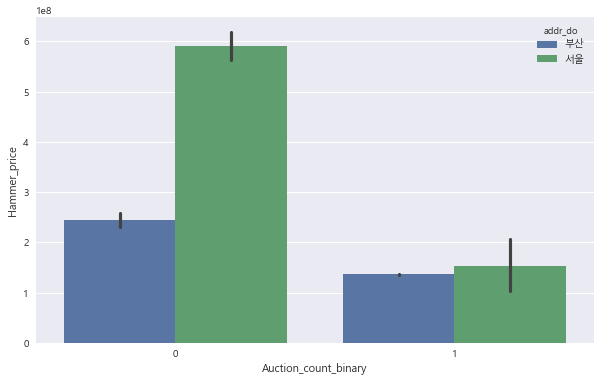

In [40]:
df['Auction_count_binary'] = df['Auction_count'].apply(lambda x:0 if x<=6 else 1)

plt.figure(figsize=(10, 6))
sns.barplot(x='Auction_count_binary', y='Hammer_price', hue='addr_do'
                 , data=df.drop(df['Hammer_price'].idxmax(), axis=0))

### 9. Auction_count, Auction_miscarriage_count PCA로 파생변수 생성

In [41]:
# 하나의 주성분으로 압축함으로서 다중공선성 문제 해결
pca = PCA(n_components=1)
df['Auction_pca'] = pca.fit_transform(df[['Auction_count', 'Auction_miscarriage_count']])

In [42]:
df.drop(['Auction_count', 'Auction_miscarriage_count'], axis=1, inplace=True)

In [43]:
# 변동 중 98%를 설명
pca.explained_variance_ratio_

array([0.98665688])

### 10. Preserve_regist_date를 이용해 주택 년수와 관련된 파생변수 생성

In [44]:
df['Preserve_regist_date'] = df['Preserve_regist_date'].replace('1111-11-11 00:00:00', np.nan)
df['Preserve_regist_date'] = df['Preserve_regist_date'].apply(pd.to_datetime)

df['regist_period'] = pd.datetime(year=2020, month=1, day=20) - df['Preserve_regist_date'] # 오늘을 기준으로 대략적인 주택연수 구함
df['regist_period'].fillna(df['regist_period'].mean(), inplace=True)
df['regist_period'] = df['regist_period'].apply(lambda x:x.days//365)

<Figure size 720x432 with 0 Axes>

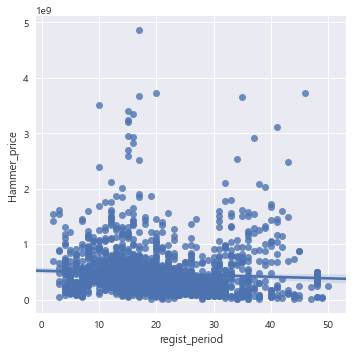

In [45]:
# 오래전에 등록되었을수록 Hammer_price가 낮아지는 경향이 아주 조금 보인다.
plt.figure(figsize=(10, 6))
sns.lmplot(y='Hammer_price', x='regist_period', data=df.drop(df['Hammer_price'].idxmax()))

---